## Afwa Afini | PYTN-KS20-018

### Context
Task 2 implements an understanding of both descriptive and inferential statistics in Python. The data to be used is the NYC Property Sales Dataset taken from __[Kaggle](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales/data)__. This dataset is a record of every building or unit sold in the New York City property market over a 12-month period.

### Content
This dataset contains the location, address, type, sale price, and sale date of building unit sold. A reference on the trickier fields:
- 'BOROUGH': A digit code for the borough the property is located in; Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

For further reference on individual fields see the __[Glossary of Terms](http://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf)__. For the building classification codes see the __[Building Classifications Glossary](https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html)__.

### Importing libraries

In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import mannwhitneyu

### Data Preprocessing & EDA

In [26]:
# load data source
data = pd.read_csv('../dataset/nyc-rolling-sales.csv')

In [27]:
# understanding the dataframe
print('dataframe shape : ', data.shape)
print('check the missing values : ', data.isna().values.any())

dataframe shape :  (84548, 22)
check the missing values :  False


In [18]:
# view the top 5 records
pd.set_option('display.max.columns', None)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,-,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,-,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,-,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,-,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,-,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [19]:
data.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [28]:
# Check for columns of categorical type
for col in data.columns:
    if data[col].dtype=='object':
        print(col, data[col].nunique())

NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


It can be seen that there are still features that are not relevant for analysis needs so they need to be removed and data type changes need to be made to some features.

In [39]:
# removed irrelavant columns
col_drops = ['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER']
data.drop(col_drops, axis=1, inplace=True)

In [30]:
# change 'SALE DATE' to datetime format
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

# change this columns to numerical type
num = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in num: # coerce for missing values
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# change this columns to categorical (object) type
obj = ['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in obj:
    df[col] = df[col].astype('category')

In [42]:
# recheck data types
data.dtypes

BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

In [33]:
# check for any missing values
data.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [34]:
# Imputing the missing values
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean(), inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].mean(), inplace=True)

In [37]:
data.isna().sum().any()

False

In [40]:
# change the borough code to the borough name in the 'BOROUGH' column
data['BOROUGH'] = data.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


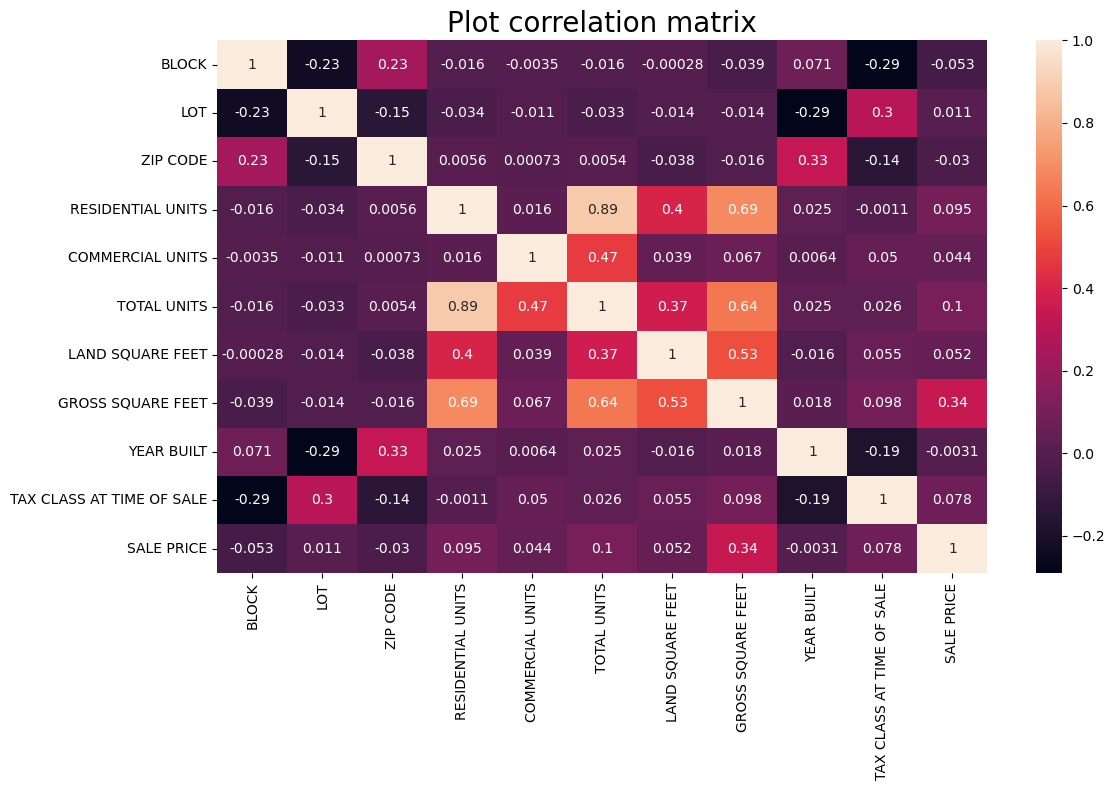

In [43]:
# View the correlation
kolom_numerik = data.select_dtypes(exclude=['object', 'datetime64[ns]'])
korelasi = kolom_numerik.corr()

plt.figure(figsize=(12,8))
sns.heatmap(korelasi, annot=True)
plt.title('Plot correlation matrix', size=20)
plt.tight_layout()
plt.show()

## **Measure of Central Tendency**
- Mean
- Median
- Mode

### **Mean** 
Mean is the average or estimate of a particular value that represents all the data.

In [47]:
mean_salePrice = statistics.mean(data['SALE PRICE'])
print('Mean of Sale Price = ', mean_salePrice)

mean_LandSquareFeet = statistics.mean(data['LAND SQUARE FEET'])
print('Mean of Land Square Feet = ', mean_LandSquareFeet)

mean_GrossSquareFeet = statistics.mean(data['GROSS SQUARE FEET'])
print('Mean of Gross Square Feet = ', mean_GrossSquareFeet)

Mean of Sale Price =  1276456.4977638705
Mean of Land Square Feet =  3941.675775353369
Mean of Gross Square Feet =  4045.707478572432


In [62]:
# Obtain the average of land area and building price in each region
mean_ = pd.DataFrame(data.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean())
mean_

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,3947.091502,4524.350262,5.901936e+05
Brooklyn,2166.259825,2570.354597,8.344884e+05
Manhattan,4114.800092,7150.756683,2.902477e+06
Queens,4167.674952,3568.246454,9.063757e+05
Staten Islands,7918.337390,2622.190827,7.525600e+05


### **Median** 
Median is defined as the middle measure (data) after sorting.

In [52]:
median_salePrice = statistics.median(data['SALE PRICE'])
print('Median of Sale Price : ', median_salePrice)

median_LandSquareFeet = statistics.median(data['LAND SQUARE FEET'])
print('Median of Land Square Feet = ', median_LandSquareFeet)

median_GrossSquareFeet = statistics.median(data['GROSS SQUARE FEET'])
print('Median of Gross Square Feet = ', median_GrossSquareFeet)

Median of Sale Price :  670000.0
Median of Land Square Feet =  3200.0
Median of Gross Square Feet =  2520.0


In [61]:
# Obtain the median of land area and building price in each region
median_ = pd.DataFrame(data.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median())
median_

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,2375.000000,1760.000000,2.700000e+05
Brooklyn,1800.000000,1536.000000,4.200000e+05
Manhattan,3941.675775,4045.707479,1.276456e+06
Queens,3941.675775,2422.000000,7.450000e+05
Staten Islands,3941.675775,1800.000000,5.650000e+05


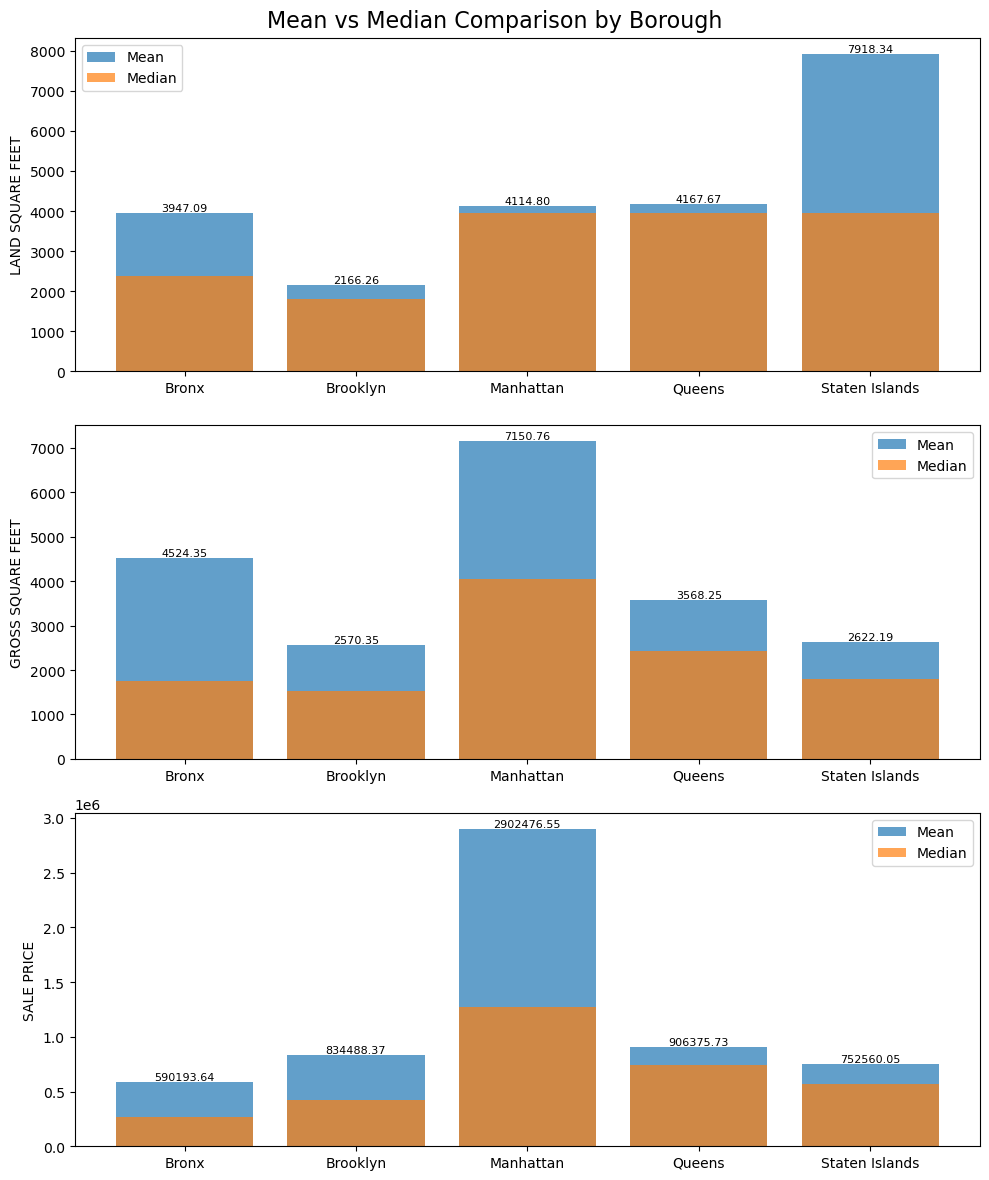

In [87]:
# Data
boroughs = mean_.index
land_square_feet_mean = mean_['LAND SQUARE FEET']
gross_square_feet_mean = mean_['GROSS SQUARE FEET']
sale_price_mean = mean_['SALE PRICE']

land_square_feet_median = median_['LAND SQUARE FEET']
gross_square_feet_median = median_['GROSS SQUARE FEET']
sale_price_median = median_['SALE PRICE']

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

def add_labels(ax, data):
    for i, value in enumerate(data):
        ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plot for LAND SQUARE FEET
axes[0].bar(boroughs, land_square_feet_mean, label='Mean', alpha=0.7)
axes[0].bar(boroughs, land_square_feet_median, label='Median', alpha=0.7)
add_labels(axes[0], land_square_feet_mean)
axes[0].set_ylabel('LAND SQUARE FEET')
axes[0].legend()

# Plot for GROSS SQUARE FEET
axes[1].bar(boroughs, gross_square_feet_mean, label='Mean', alpha=0.7)
axes[1].bar(boroughs, gross_square_feet_median, label='Median', alpha=0.7)
add_labels(axes[1], gross_square_feet_mean)
axes[1].set_ylabel('GROSS SQUARE FEET')
axes[1].legend()

# Plot for SALE PRICE
axes[2].bar(boroughs, sale_price_mean, label='Mean', alpha=0.7)
axes[2].bar(boroughs, sale_price_median, label='Median', alpha=0.7)
add_labels(axes[2], sale_price_mean)
axes[2].set_ylabel('SALE PRICE')
axes[2].legend()

# Set common title
fig.suptitle('Mean vs Median Comparison by Borough', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

### **Mode**
Mode is the value with the most frequency.

In [68]:
# dictionaries for mapping codes to borough names
borough_map = {1: 'Manhattan',
               2: 'Bronx',
               3: 'Brooklyn',
               4: 'Queens',
               5: 'Staten Island'}

# calculate the mode
borough_mode = df['BOROUGH'].mode().iloc[0]

# change the mode value to borough name
see_borough_mode = borough_map[borough_mode]
print('Mode of Borough : ', see_borough_mode)

# calculate the mode in the neighborhood
neighborhood_mode = df['NEIGHBORHOOD'].mode().iloc[0]
print('Mode of Neighborhood : ', neighborhood_mode)

# calculate the mode in the building class category
category_mode = df['BUILDING CLASS CATEGORY'].mode().iloc[0]
print('Mode of Building Class Category : ', category_mode)

Mode of Borough :  Queens
Mode of Neighborhood :  FLUSHING-NORTH
Mode of Building Class Category :  01 ONE FAMILY DWELLINGS                    


## **Measure of Spread**
- Range
- Variance
- Standard Deviation

### **Range**
In statistics, "range" refers to the difference between the highest (maximum) value and the lowest (minimum) value in a data set. Range is used to give an idea of the spread of data in a distribution or data set.

In [69]:
range_block = np.ptp(df['BLOCK'])
range_lot = np.ptp(df['LOT'])
range_zip_code = np.ptp(df['ZIP CODE'])
range_residential_units = np.ptp(df['RESIDENTIAL UNITS'])
range_commercial_units = np.ptp(df['COMMERCIAL UNITS'])
range_total_units = np.ptp(df['TOTAL UNITS'])
range_sale_price = np.ptp(df['SALE PRICE'])

print('Range of Block : ', range_block)
print('Range of LOT : ', range_lot)
print('Range of Zip Code : ', range_zip_code)
print('Range of Residence Units : ', range_residential_units)
print('Range of Commercial Units : ', range_commercial_units)
print('Range of Total Units : ', range_total_units)
print('Range of Sale Price : ', range_sale_price)

Range of Block :  16321
Range of LOT :  9105
Range of Zip Code :  11694
Range of Residence Units :  1844
Range of Commercial Units :  2261
Range of Total Units :  2261
Range of Sale Price :  2210000000


### **Variance**
In statistics, "variance" is a statistical measure used to quantify the spread or variation of data within a distribution or data set. Variance gives an idea of how far the data is spread out from the mean or center value.

In [71]:
var_salePrice = df['SALE PRICE'].var(ddof=1)
print('Variance of Sale Price : ', var_salePrice)

Variance of Sale Price :  107909296048288.34


### **Standard Deviation**
In statistics, "standard deviation" is a measure used to quantify the spread or dispersion of data in a distribution or data set. Standard deviation measures how far each data point is from the mean or center value of the distribution.

In [72]:
std_salePrice = df['SALE PRICE'].std(ddof=1)
print('Standard Deviation of Sale Price : ', std_salePrice)

Standard Deviation of Sale Price :  10387939.93283983


## **Probability Distribution**

**RESEARCH QUESTION**<br>
>    Is there a difference in units sold between properties built in 1900-1958 and 1959-2017?<br><br>

**HYPOTHESIS FORMULATION**<br>
>   H0: There is no difference in the number of units sold between the two property groups.<br>
>   H1: There is a difference in the number of units sold between the two property groups<br><br>

### **Data Collect**
**Group 1** is a group of properties built in 1959-2017.

In [20]:
# Group 1: Year Built in 1968-2017
filtered_category1 = df[(df['YEAR BUILT'] >= 1959) & (df['YEAR BUILT'] <= 2017)]
year_built_cat1 = filtered_category1['YEAR BUILT'].value_counts().sort_index() # Pandas Series

year_built_cat1.shape

(59,)

In [42]:
# view summary statistic of Group 1
print('Descriptive Statistic of Group 1')
print('================================')
print('Mean : ', year_built_cat1.mean())
print('Median :', year_built_cat1.median())
print('Minimum :', year_built_cat1.min())
print('Maximum :', year_built_cat1.max())
print('Standard Deviation :', year_built_cat1.std())

Descriptive Statistic of Group 1
Mean :  489.1694915254237
Median : 302.0
Minimum : 6
Maximum : 2654
Standard Deviation : 464.2496412470481


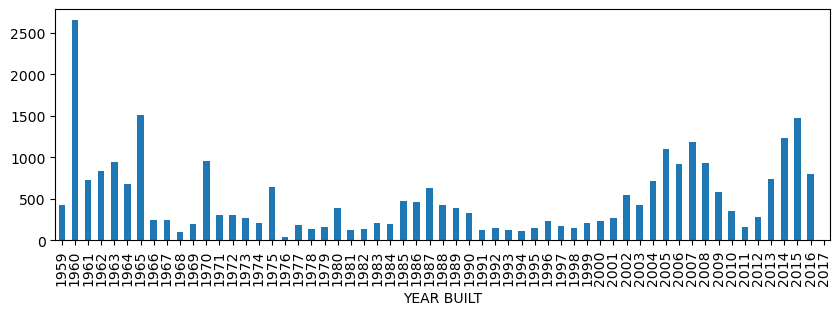

In [21]:
# visualize Group 1
plt.figure(figsize=(10,3))
year_built_cat1.plot(kind='bar')
plt.show()

In [77]:
# normality test data Group 1 use the Shapiro test
array_group1 = np.array(year_built_cat1)

stat, p = shapiro(array_group1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.781, p=0.000
Probably not Gaussian


**Group 2** is a group of properties built between 1900-1958.

In [24]:
# Group 2: Year Built in 1918-1967
filtered_category2 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 1958)]
year_built_cat2 = filtered_category2['YEAR BUILT'].value_counts().sort_index() # Pandas Series

year_built_cat2.shape

(59,)

In [41]:
# view summary statistic of Group 2
print('Descriptive Statistic of Group 2')
print('================================')
print('Mean : ', year_built_cat2.mean())
print('Median :', year_built_cat2.median())
print('Minimum :', year_built_cat2.min())
print('Maximum :', year_built_cat2.max())
print('Standard Deviation :', year_built_cat2.std())

Descriptive Statistic of Group 2
Mean :  790.7966101694915
Median : 235.0
Minimum : 8
Maximum : 6045
Standard Deviation : 1285.8571108966514


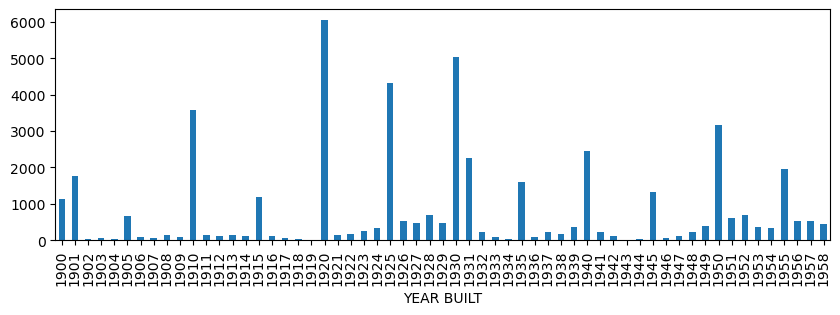

In [25]:
# visualize Group 2
plt.figure(figsize=(10,3))
year_built_cat2.plot(kind='bar')
plt.show()

In [76]:
# normality test data Group 2 use the Shapiro test
array_group2 = np.array(year_built_cat2)

stat, p = shapiro(array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.622, p=0.000
Probably not Gaussian


**Insight:**
>The normality test showed that both data groups did not fulfill the assumption of a normal/gaussian distribution with a p value that was not greater than the 5% significance level.

## **Correlation Tests**

In [73]:
# Use the Pearson's Correlation
stat, p = pearsonr(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.031, p=0.817
Probably independent


In [28]:
# Use the Spearman's Rank Correlation
stat, p = spearmanr(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.053, p=0.690
Probably independent


In [29]:
# Use the Kendall's Rank Correlation
stat, p = kendalltau(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.038, p=0.671
Probably independent


**Interpret the p-value:**
>The Correlation Test shows that the two groups of data tend to be independent with the p-value always greater than the 0.05 significance level. This means that the two data are not correlated with each other in terms of linear correlation.

## **Hypothesis Testing**<br>
The statistical test method used is a non-parametric statistical test, namely the Mann-Whitney U test.
<br><br>
The Mann-Whitney U test is used to compare two independent groups of data and does not rely on the assumption of normal distribution.

In [31]:
array_group1 = np.array(year_built_cat1)
array_group2 = np.array(year_built_cat2)
stat, p = mannwhitneyu(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=1944.500, p=0.273
Probably the same distribution


**Interpret the p-value**
> H0 fails to be rejected, meaning that there is no difference in the number of units sold between the two groups of properties based on their year of construction. This is indicated by the p-value that is greater than the alpha criterion (0.05) through the Mann-Whitney U test.

### **Confidence Intervals**<br>
CI is a range of values used to measure the extent to which we are confident that a population parameter is within that range. In this test, CI is calculated using the bootstrap method. 
<br><br>
Bootstrap CI is suitable for data that is not normally distributed or data that has characteristics that do not meet the assumption of normality.

In [32]:
array_group1 = np.array(year_built_cat1)
array_group2 = np.array(year_built_cat2)

# Jumlah bootstrap
n_bootstrap = 10000

# List untuk menyimpan perbedaan mean
bootstrap_diff_means = []

# Proses bootstrap
for i in range(n_bootstrap):
    # Resampling dengan penggantian
    sample1 = np.random.choice(array_group1, size=len(array_group1), replace=True)
    sample2 = np.random.choice(array_group2, size=len(array_group2), replace=True)
    
    # Perhitungan mean dan perbedaan mean
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    diff_mean = mean1 - mean2
    
    # Menyimpan perbedaan mean
    bootstrap_diff_means.append(diff_mean)
    
# Menghitung Confidence Interval
ci_lower = np.percentile(bootstrap_diff_means, 2.5)
ci_upper = np.percentile(bootstrap_diff_means, 97.5)

print(f'95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})')

95% Confidence Interval: (-667.12, 23.40)


**Insight:**
>The CI spans zero (in this case, -667.12 to 23.40), indicating that there is no significant difference between the two groups of sold properties. This reinforces that H0 fails to be rejected, meaning that there is no difference in the number of units sold between the two groups of properties divided by year of construction.